In [1]:
from ipynb.fs.full.Funcs import *

In [2]:
path = r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData'
all_files = glob.glob(path + "/*")

for filename in all_files:
    print(filename)

C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\BoM-declared-ENSO-phases_SOI-based.csv
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\BoM-declared-ENSO-phases_SOI-based.xlsx
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyDMI.txt
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyGlobalSSTA.txt
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyGlobalT.txt
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyNino3p4.txt
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlySAM.txt
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlySOI.txt
C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\SSTAnomaly_TasmanSea.txt


In [3]:
DMI = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyDMI.txt', sep="\s+")
SSTA = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyGlobalSSTA.txt', sep="\s+")
GlobalT = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyGlobalT.txt', sep="\s+")
Nino3p4 = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlyNino3p4.txt', sep="\s+")
SAM = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlySAM.txt', sep="\s+")
SOI = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\MonthlySOI.txt', sep="\s+")
SSTATasman = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\SSTAnomaly_TasmanSea.txt', sep="\s+")
ENSOPhases = pd.read_csv(r'C:/Users/varsh/OneDrive/Desktop/Honours/ClimateDriverData\BoM-declared-ENSO-phases_SOI-based.csv')

In [4]:
#extract summer years and put them in new df
SSTASummer = SSTA.loc[3:, ["Year","Jan", "Feb", "Mar", "Dec"]]
DMISummer = DMI.loc[3:, ["Year","Jan", "Feb", "Mar", "Dec"]]
GlobalTSummer = GlobalT.loc[3:, ["Year","Jan", "Feb", "Mar", "Dec"]]
Nino3p4Summmer= Nino3p4.loc[3:, ["Year","Jan", "Feb", "Mar", "Dec"]]
SAMSummer = SAM.loc[3:, ["Year","Jan", "Feb", "Mar", "Dec"]]
SOISummer = SOI.loc[3:, ["Year","Jan", "Feb", "Mar", "Dec"]]
SSTATasmanSummer = SSTATasman.loc[3:, ["Year","Summer"]]


minYear = 1962 #the year from which we want to start looking at, this matches the Richmond and Syd Dataset
splitYear = 1991 #the year which will be used to split the df into 2 periods
maxYear = 2021

#use dataMelter function from funcs import to clean up the data 
SSTASummer = dataMelter(SSTASummer, minYear, splitYear,maxYear)
DMISummer = dataMelter(DMISummer, minYear, splitYear, maxYear)
GlobalTSummer = dataMelter(GlobalTSummer, minYear, splitYear, maxYear)
Nino3p4Summmer = dataMelter(Nino3p4Summmer, minYear, splitYear, maxYear)
SAMSummer = dataMelter(SAMSummer, minYear, splitYear, maxYear)
SOISummer = dataMelter(SOISummer, minYear, splitYear, maxYear)
SSTATasmanSummer = dataMelter(SSTATasmanSummer, minYear, splitYear, maxYear)

In [5]:
#for plotting
ENSOPhases["min"] =ENSOPhases["sYear"] - 0.5
ENSOPhases["max"] =ENSOPhases["sYear"]  + 0.5

## MonthlyGlobalSSTA

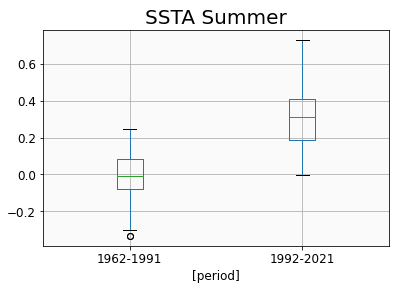

In [6]:
SSTASummer.boxplot(column ='value', by = ["period"])
plt.suptitle(" ")
plt.title("SSTA Summer")
plt.show()


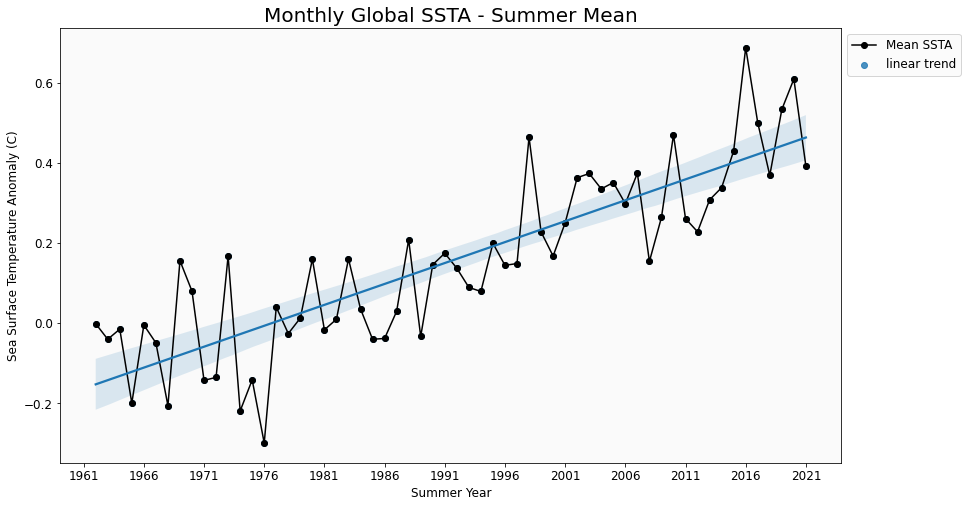

In [7]:
#line graph of the summer averages

data = SSTASummer.groupby("sYear").mean()["value"]
y = data.values
x = data.index

ax = (((data.plot(marker = 'o', color = 'black', figsize = (14,8), label = 'Mean SSTA')
  )))
sns.regplot(x=x, y=y, data=data, label = 'linear trend')


ax.set_xticks(np.arange(1961,2022,5))
ax.legend(bbox_to_anchor=(1.0, 1))
ax.set_ylabel('Sea Surface Temperature Anomaly (C)')
ax.set_xlabel('Summer Year')
plt.title("Monthly Global SSTA - Summer Mean")    
plt.show()

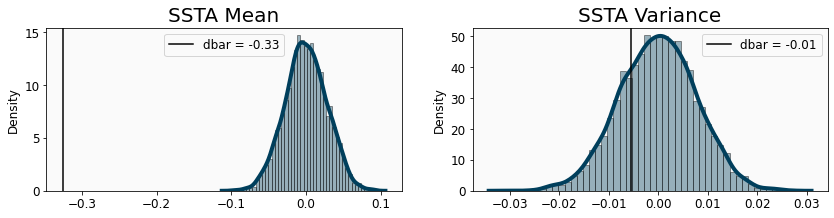

P-Value for Difference in Mean: 0.0
P-Value for Difference in Variance: 0.484


In [8]:
#permutation testing
x1 = SSTASummer.loc[SSTASummer.periodNum ==1, 'value']
x2 = SSTASummer.loc[SSTASummer.periodNum ==2, 'value']

dbarMean, zMean, pMean = p_value(x1,x2, func = 'mean')

fig, ax = plt.subplots(1,2, figsize = (14,3))

#density plot for mean
sns.distplot(zMean, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
        color = '#003f5c',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4}, ax = ax[0])
ax[0].set_title('SSTA Mean')  
    #line for dbar
ax[0].axvline(x=dbarMean, color = 'black', label = 'dbar = {:.2f}'.format(dbarMean))
ax[0].legend()
    
    
dbarVar, zVar, pVar = p_value(x1,x2, func = 'variance')
    
#density plot for variance
sns.distplot(zVar, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
        color = '#003f5c',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4}, ax = ax[1])
ax[1].set_title('SSTA Variance')  
    #line for dbar
ax[1].axvline(x=dbarVar, color = 'black', label = 'dbar = {:.2f}'.format(dbarVar))
ax[1].legend()



plt.show()

print(f"P-Value for Difference in Mean: {pMean}" )
print(f"P-Value for Difference in Variance: {pVar}" )

## MonthlyGlobalSSTA

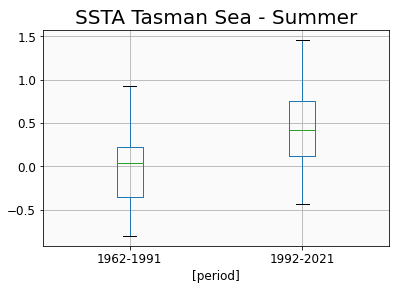

In [9]:
SSTATasmanSummer.boxplot(column ='value', by = ["period"])
plt.suptitle(" ")
plt.title("SSTA Tasman Sea - Summer")
plt.show()

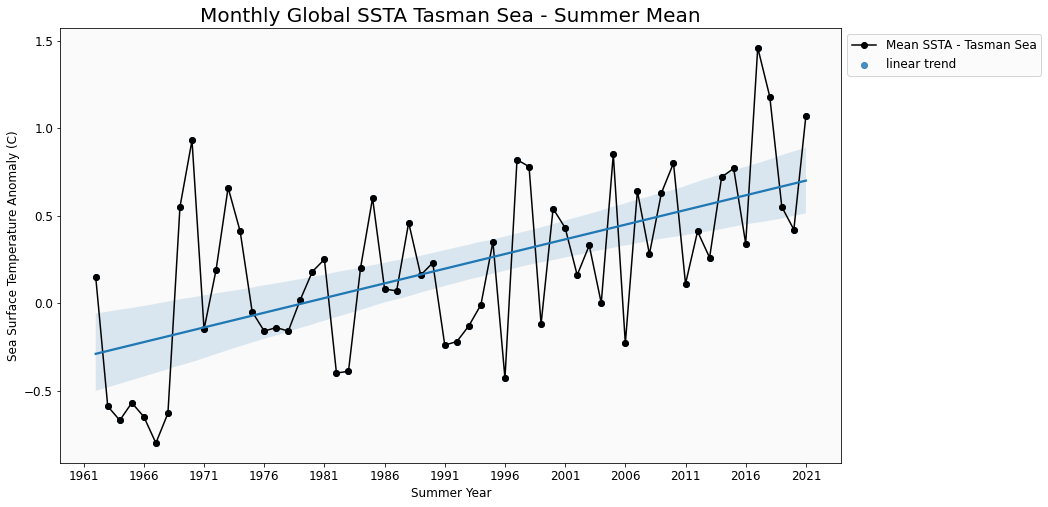

In [10]:
#line graph of the summer averages

data = SSTATasmanSummer.groupby("sYear").mean()["value"]
y = data.values
x = data.index

ax = (((data.plot(marker = 'o', color = 'black', figsize = (14,8), label = 'Mean SSTA - Tasman Sea')
  )))
sns.regplot(x=x, y=y, data=data, label = 'linear trend')


ax.set_xticks(np.arange(1961,2022,5))
ax.legend(bbox_to_anchor=(1.0, 1))
ax.set_ylabel('Sea Surface Temperature Anomaly (C)')
ax.set_xlabel('Summer Year')
plt.title("Monthly Global SSTA Tasman Sea - Summer Mean")    
plt.show()

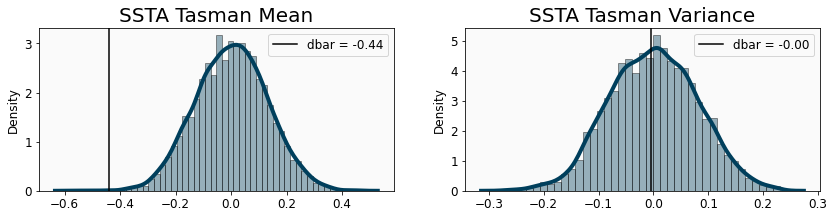

P-Value for Difference in Mean: 0.001
P-Value for Difference in Variance: 0.9652


In [11]:
#permutation testing
x1 = SSTATasmanSummer.loc[SSTATasmanSummer.periodNum ==1, 'value']
x2 = SSTATasmanSummer.loc[SSTATasmanSummer.periodNum ==2, 'value']

dbarMean, zMean, pMean = p_value(x1,x2, func = 'mean')

fig, ax = plt.subplots(1,2, figsize = (14,3))

#density plot for mean
sns.distplot(zMean, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
        color = '#003f5c',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4}, ax = ax[0])
ax[0].set_title('SSTA Tasman Mean')  
    #line for dbar
ax[0].axvline(x=dbarMean, color = 'black', label = 'dbar = {:.2f}'.format(dbarMean))
ax[0].legend()
    
    
dbarVar, zVar, pVar = p_value(x1,x2, func = 'variance')
    
#density plot for variance
sns.distplot(zVar, hist=True, kde=True, #normed historgram with gaussian kernel density estimate
        color = '#003f5c',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4}, ax = ax[1])
ax[1].set_title('SSTA Tasman Variance')  
    #line for dbar
ax[1].axvline(x=dbarVar, color = 'black', label = 'dbar = {:.2f}'.format(dbarVar))
ax[1].legend()



plt.show()

print(f"P-Value for Difference in Mean: {pMean}" )
print(f"P-Value for Difference in Variance: {pVar}" )

## MonthlyNino3p4 

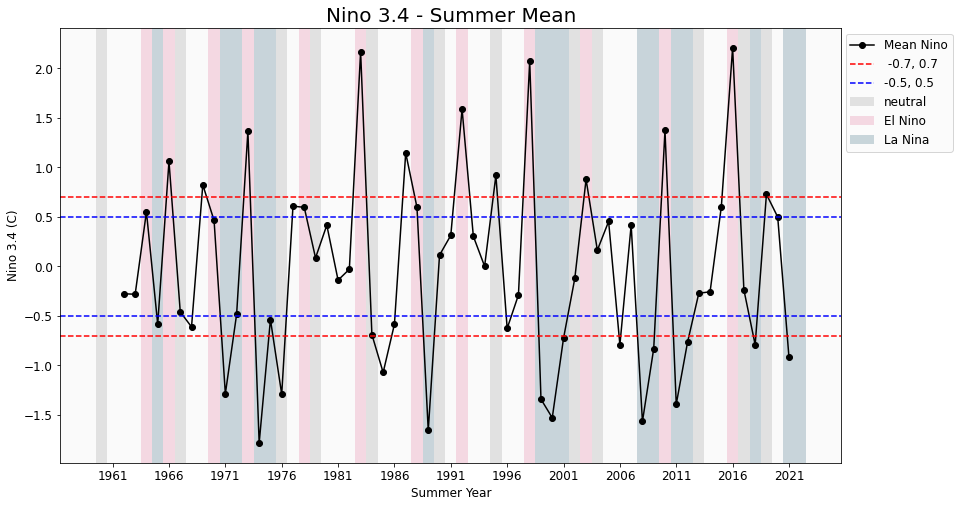

In [12]:
#line graph of the summer averages

data = Nino3p4Summmer.groupby("sYear").mean()["value"]
y = data.values
x = data.index

ax = (((data.plot(marker = 'o', color = 'black', figsize = (14,8), label = 'Mean Nino')
  )))

ax.set_xticks(np.arange(1961,2022,5))
ax.legend(bbox_to_anchor=(1.0, 1))
ax.set_ylabel('Nino 3.4 (C)')
ax.set_xlabel('Summer Year')

ax.axhline(0.7, c = 'r', linestyle='--', label = ' -0.7, 0.7')
ax.axhline(-0.7, c = 'r', linestyle='--')

ax.axhline(0.5, c = 'b', linestyle='--', label = '-0.5, 0.5')
ax.axhline(-0.5, c = 'b', linestyle='--')


for mini, maxi, phase in zip(ENSOPhases["min"], ENSOPhases["max"], ENSOPhases["BoM declared ENSO phase"]):
    if phase == "El Nino":
        ax.axvspan(mini, maxi, alpha=0.2, color='#dd5182', ec = None, label = "El Nino")
    elif phase == "La Nina":
        ax.axvspan(mini, maxi, alpha=0.2, color='#003f5c', ec = None, label = "La Nina")
    elif phase == "neutral":
        ax.axvspan(mini, maxi, alpha=0.2, color='grey', ec = None, label = "neutral" )

handles, labels = ax.get_legend_handles_labels()
      
plt.legend(labels = labels[:6], handles = handles[:6], loc = 'best', bbox_to_anchor=(1.15, 1))

plt.title("Nino 3.4 - Summer Mean")    
plt.show()

## DMI and SAM

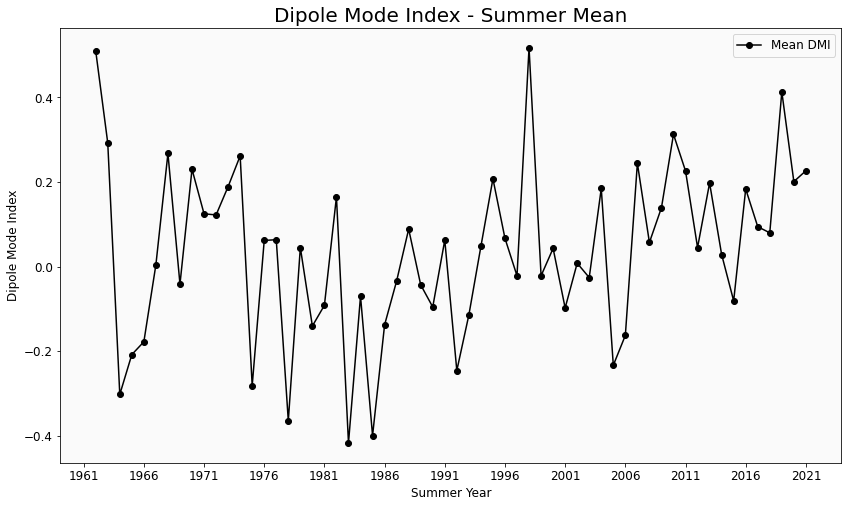

In [13]:
#line graph of the summer averages

data = DMISummer.groupby("sYear").mean()["value"]
y = data.values
x = data.index

ax = (((data.plot(marker = 'o', color = 'black', figsize = (14,8), label = 'Mean DMI')
  )))


ax.set_xticks(np.arange(1961,2022,5))
ax.legend(bbox_to_anchor=(1.0, 1))
ax.set_ylabel('Dipole Mode Index')
ax.set_xlabel('Summer Year')
plt.title("Dipole Mode Index - Summer Mean")    
plt.show()

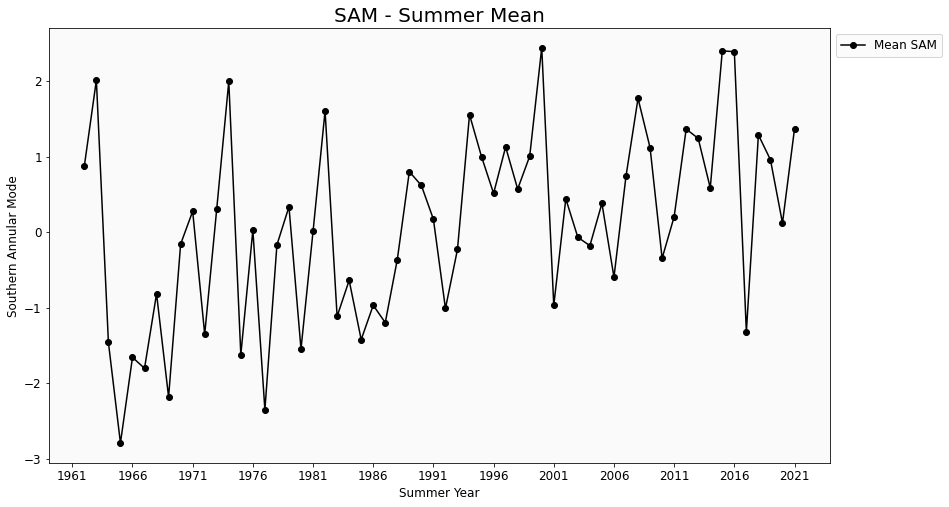

In [14]:
#line graph of the summer averages

data = SAMSummer.groupby("sYear").mean()["value"]
y = data.values
x = data.index

ax = (((data.plot(marker = 'o', color = 'black', figsize = (14,8), label = 'Mean SAM')
  )))


ax.set_xticks(np.arange(1961,2022,5))
ax.legend(bbox_to_anchor=(1.0, 1))
ax.set_ylabel('Southern Annular Mode')
ax.set_xlabel('Summer Year')
plt.title("SAM - Summer Mean")    
plt.show()

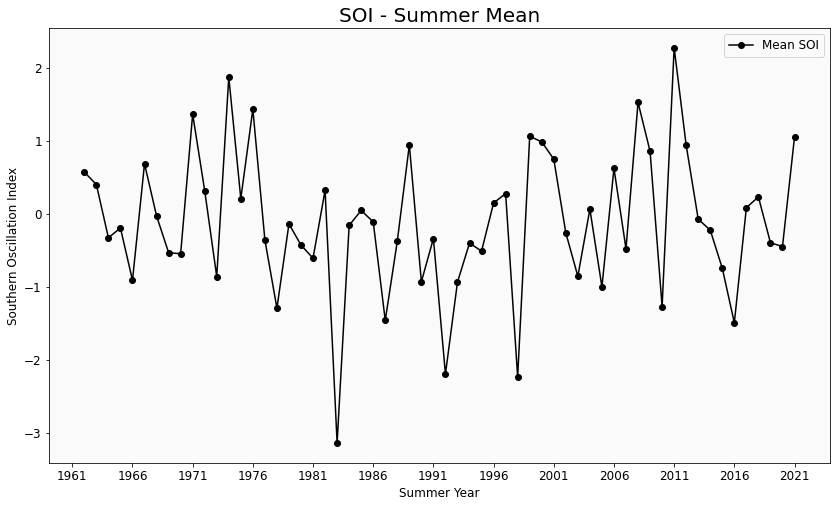

In [15]:
#line graph of the summer averages

data = SOISummer.groupby("sYear").mean()["value"]
y = data.values
x = data.index

ax = (((data.plot(marker = 'o', color = 'black', figsize = (14,8), label = 'Mean SOI')
  )))


ax.set_xticks(np.arange(1961,2022,5))
ax.legend(bbox_to_anchor=(1.0, 1))
ax.set_ylabel('Southern Oscillation Index')
ax.set_xlabel('Summer Year')
plt.title("SOI - Summer Mean")    
plt.show()

In [16]:
Nino3p4ML = Nino3p4.iloc[0:-1,[0,7,8,9,10,11,12]]


Nino3p4ML.loc[: ,"JAS"] =  Nino3p4ML[["Jul", "Aug","Sep"]].mean(axis=1)
Nino3p4ML.loc[: ,"ASO"] =  Nino3p4ML[["Aug","Sep", "Oct"]].mean(axis=1)
Nino3p4ML.loc[: ,"SON"] =  Nino3p4ML[["Sep","Oct", "Nov"]].mean(axis=1)
Nino3p4ML.loc[: ,"OND"] =  Nino3p4ML[["Oct","Nov", "Dec"]].mean(axis=1)

Nino3p4ML

,Year,Jul,Aug,Sep,Oct,Nov,Dec,JAS,ASO,SON,OND
0,1957,0.69,0.79,0.53,0.74,1.09,1.18,0.670000,0.686667,0.786667,1.003333
1,1958,0.04,0.24,-0.31,-0.03,0.05,0.30,-0.010000,-0.033333,-0.096667,0.106667
2,1959,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.406667,-0.276667,-0.196667,-0.036667
3,1960,-0.25,-0.00,0.03,-0.07,-0.38,0.02,-0.073333,-0.013333,-0.140000,-0.143333
4,1961,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.363333,-0.493333,-0.473333,-0.396667
...,...,...,...,...,...,...,...,...,...,...,...
60,2017,0.22,-0.18,-0.56,-0.52,-0.84,-0.85,-0.173333,-0.420000,-0.640000,-0.736667
61,2018,0.27,0.05,0.30,0.84,1.00,0.97,0.206667,0.396667,0.713333,0.936667
62,2019,0.41,0.19,0.11,0.55,0.74,0.51,0.236667,0.283333,0.466667,0.600000
63,2020,-0.04,-0.42,-0.66,-1.19,-1.01,-0.98,-0.373333,-0.756667,-0.953333,-1.060000


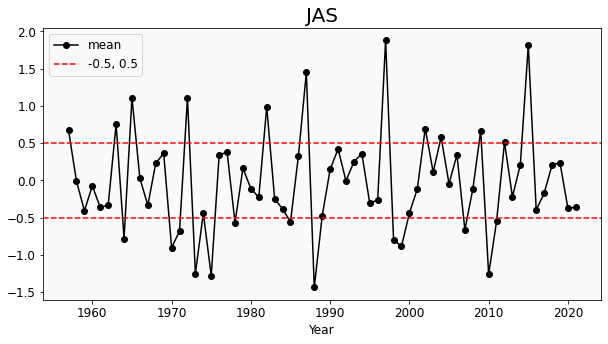

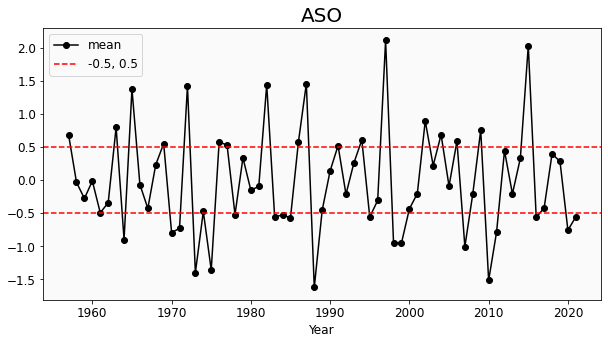

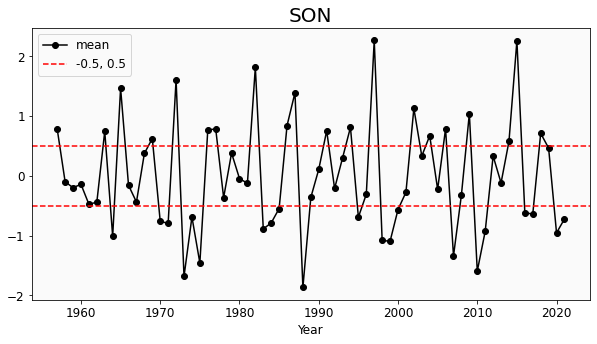

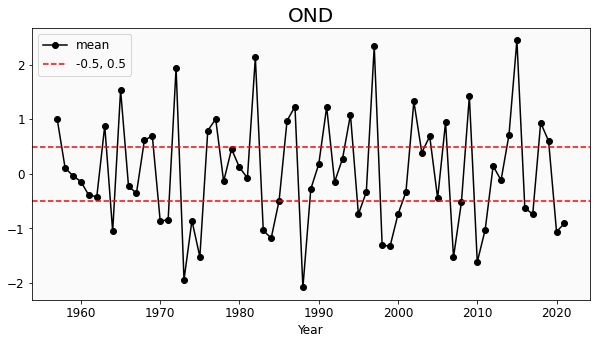

In [17]:
for i in Nino3p4ML.iloc[:,[7,8,9,10]].columns:
    Nino3p4ML.plot(x = "Year", y=i, marker = 'o', color = 'black', figsize = (10,5), label = 'mean')
    plt.legend().remove()
    plt.title(i)
    plt.axhline(0.5, c = 'r', linestyle='--', label = '-0.5, 0.5')
    plt.axhline(-0.5, c = 'r', linestyle='--')
    plt.legend(loc = "upper left")


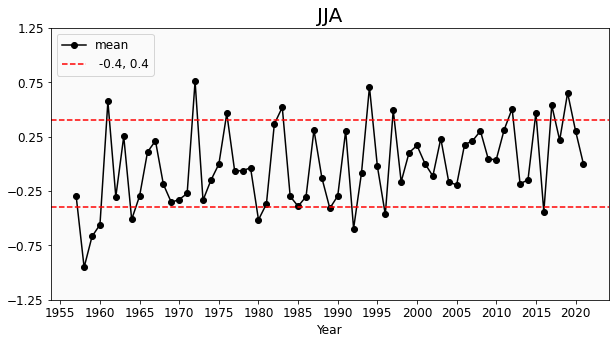

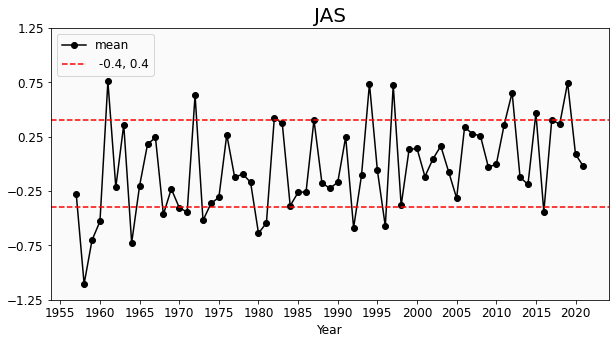

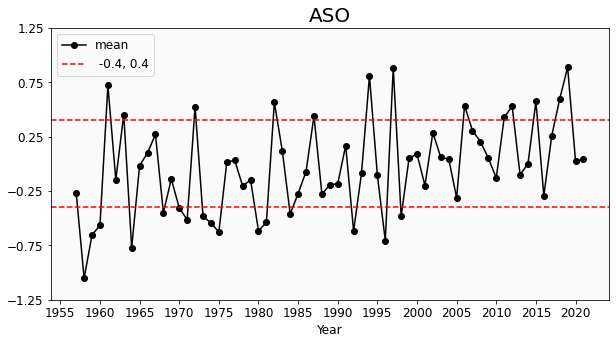

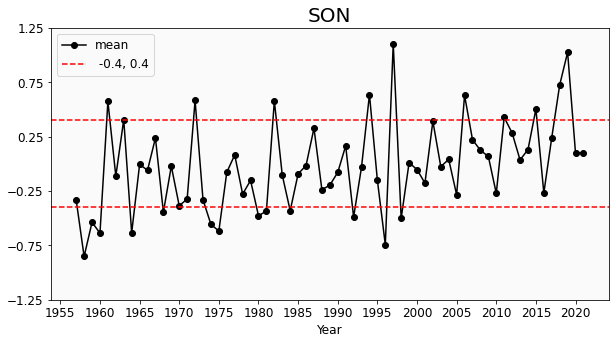

In [18]:
DMIML = DMI.iloc[0:-1,[0,6,7,8,9,10,11]]

DMIML.loc[: ,"JJA"] =  DMIML[["Jun","Jul", "Aug"]].mean(axis=1)
DMIML.loc[: ,"JAS"] =  DMIML[["Jul", "Aug","Sep"]].mean(axis=1)
DMIML.loc[: ,"ASO"] =  DMIML[["Aug","Sep", "Oct"]].mean(axis=1)
DMIML.loc[: ,"SON"] =  DMIML[["Sep","Oct", "Nov"]].mean(axis=1)

DMIML

for i in DMIML.iloc[:,[7,8,9,10]].columns:
    DMIML.plot(x = "Year", y=i, marker = 'o', color = 'black', figsize = (10,5), label = 'mean')
    plt.legend().remove()
    plt.title(i)
    plt.axhline(0.4, c = 'r', linestyle='--', label = ' -0.4, 0.4')
    plt.axhline(-0.4, c = 'r', linestyle='--')
    plt.legend(loc = 'upper left')
    plt.yticks(np.arange(-1.25,1.5,.5))
    plt.xticks(np.arange(1955,2022,5))



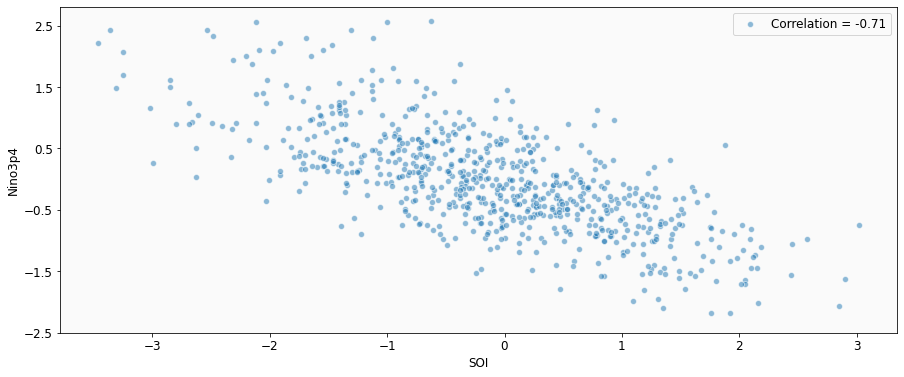

In [19]:
#scatter with correlation
SOIcorr = dataMelter(SOI.iloc[:,:-1], minYear, splitYear, maxYear)
Nino3p4corr = dataMelter(Nino3p4.iloc[:,:], minYear, splitYear, maxYear)


x1 = SOIcorr['value']
y1 =  Nino3p4corr['value']
corr1 = x1.corr(y1)


fig, ax = plt.subplots(1,figsize=(15,6))

yticks = np.arange(-2.5,3.5,1)
xticks = np.arange(-3,3.5,1)
ax.scatter(x = x1, y = y1, alpha = 0.5, ec = 'white', label = "Correlation = {:.2f}".format(corr1))
ax.set_xlabel("SOI")
ax.set_ylabel("Nino3p4")
ax.set_title("")
ax.legend()
ax.set_xticks(xticks)
ax.set_yticks(yticks)




plt.show()

